In [20]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
session = plot_oa('D:/obstacle_avoidance/metadata/G8CK0_oa_042823_050323.json')
session.gather_session_df('obstacle')
session.cluster(6)
session.plot_trace_cluster_single_animal()
df = session.df

6


In [102]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\050323\G8CKTT\oa\processed_G8CKTT_050323_oa.h5")
session = plot_oa('metadata',df)


In [107]:
session.cluster(6)
session.plot_trace_cluster_single_animal()

6


In [84]:
session.plot_trace_cluster_single_animal_multiday()

In [85]:
session.get_body_angle()
session.get_head_angle()
session.get_midpoint_edge()
session.get_obstacle_intersect_body()
session.get_obstacle_intersect_nose()
session.get_intersect_counts_bins()
session.get_intersect_mean_counts()
session.facing_angle()
        

UnboundLocalError: local variable 'points_x' referenced before assignment

In [23]:
gt_label = df['cluster_label'].astype(int).tolist()

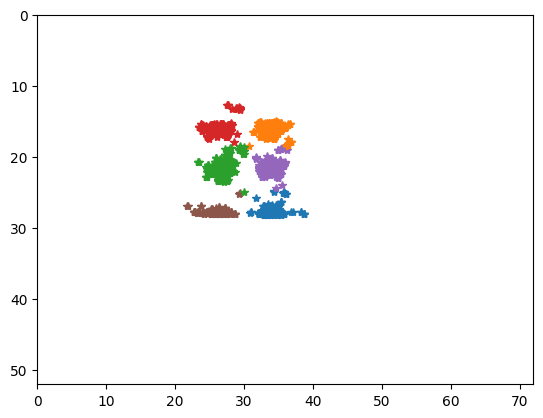

In [67]:
gt_label = df['obstacle_cluster'].astype(int).tolist()
#create obstacle_xypos array 
obstacle_xpos = np.array(df.loc[:,'gt_obstacle_cen_x_cm'])
obstacle_ypos = np.array(df.loc[:,'gt_obstacle_cen_y_cm'])
obstacle_xypos_ar = np.stack((obstacle_xpos, obstacle_ypos))
plt.figure()
for i in range(len(df['obstacle_cluster'])):
    obstacle_xypos = obstacle_xypos_ar[:,i] 
    plt.plot(obstacle_xypos[0], obstacle_xypos[1], '*', color=list(mcolors.TABLEAU_COLORS)[gt_label[i]])
    plt.ylim([52,0]); plt.xlim([0, 72])

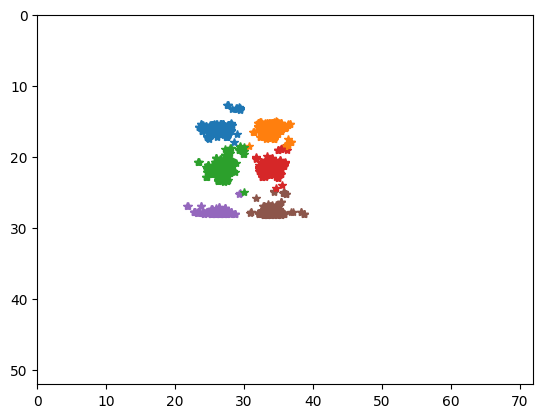

In [68]:
gt_label = df['cluster_label'].astype(int).tolist()
#create obstacle_xypos array 
obstacle_xpos = np.array(df.loc[:,'gt_obstacle_cen_x_cm'])
obstacle_ypos = np.array(df.loc[:,'gt_obstacle_cen_y_cm'])
obstacle_xypos_ar = np.stack((obstacle_xpos, obstacle_ypos))
plt.figure()
for i in range(len(df['obstacle_cluster'])):
    obstacle_xypos = obstacle_xypos_ar[:,i] 
    plt.plot(obstacle_xypos[0], obstacle_xypos[1], '*', color=list(mcolors.TABLEAU_COLORS)[gt_label[i]])
    plt.ylim([52,0]); plt.xlim([0, 72])

In [12]:
x_pos,y_pos  = np.sort(df['mean_gt_obstacle_cen_x_cm'].unique()),np.sort(df['mean_gt_obstacle_cen_y_cm'].unique())

In [13]:
x_pos,y_pos

(array([25.60993259, 26.42889006, 26.75231053, 33.7790173 , 33.9870879 ,
        34.10278153]),
 array([15.64928596, 15.77213121, 21.44580177, 21.53113798, 27.77765561,
        27.8602421 ]))

In [14]:
pd.unique(df['cluster_label'])

array([0., 3., 2., 1.])

In [ ]:
df.columns.to_numpy()

In [30]:
len(df.at[1,'trial_timestamps'])

263

In [31]:
len(df.at[1,'nose_x_cm'])

263

In [32]:
for ind, row in df.iterrows():
            temp_time = np.diff(row['trial_timestamps'])
            x = np.diff(row['nose_x_cm']); y = np.diff(row['nose_y_cm'])
            if len(x) == len(temp_time):
                xspeed = list((x/temp_time)**2)
            elif len(x) > len(temp_time):
                xspeed = list((x[:len(temp_time)]/temp_time)**2)
            elif len(x) < len(temp_time):
                xspeed = list((x/temp_time[:len(x)])**2)
            if len(y) == len(temp_time):
                yspeed = list((y/temp_time)**2)
            elif len(y) > len(temp_time):
                yspeed = list((y[:len(temp_time)]/temp_time)**2)
            elif len(y) < len(temp_time):
                yspeed = list((y/temp_time[:len(y)])**2)
            df.at[ind, 'speed'] = np.sqrt(xspeed + yspeed).astype(object)

In [33]:
df['speed'].head()

0    [20.73415995663291, 22.015838561580885, 19.916...
1    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
3    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
4    [3.2761003524276373, 0.10022481270447717, 0.22...
5    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Name: speed, dtype: object

In [41]:
temp_time = np.abs(np.diff(df.at[1,'ts_nose_x_cm']))

In [42]:
temp_time

array([0.6270705722212, 0.5162918605286464, 0.45720009624816527,
       0.5684001817906505, 0.537190109670064, 0.6602218047740394,
       0.40301804750000514, 0.5085556260254549, 0.43223487927429005,
       0.25121456715987733, 0.3076644594374329, 0.5713450642025037,
       0.4225858915646796, 0.570639618094205, 0.6036724872060475,
       0.37615901547025743, 0.37983301667863145, 0.5333930104830671,
       0.34614678137251786, 0.18822627840196304, 0.15757251445403853,
       0.30322109586261803, 0.02224759236871421, 0.006647290846075293,
       0.005099097037899014, 0.03206939070217629, 0.017799494256266257,
       0.010995963668086972, 0.036441736212388776, 0.16048898964006497,
       0.1932614591817341, 0.1655383740327494, 0.09499376320195552,
       0.09860858268982753, 0.07675395694520404, 0.0964804080208097,
       0.0296973873447115, 0.014572906854844803, 0.013438985090147071,
       0.011523864614915169, 0.016227627759903385, 0.01749174930969133,
       0.011869485862604279, 0.0

In [48]:
pd.Series(df.at[1,'ts_nose_x_cm']).interpolate().to_numpy()

array([48.65901174093105, 48.03194116870985, 47.5156493081812,
       47.05844921193304, 46.49004903014239, 45.95285892047232,
       45.292637115698284, 44.88961906819828, 44.381063442172824,
       43.948828562898534, 43.69761399573866, 43.38994953630122,
       42.81860447209872, 42.39601858053404, 41.825378962439835,
       41.22170647523379, 40.84554745976353, 40.4657144430849,
       39.93232143260183, 39.586174651229314, 39.39794837282735,
       39.24037585837331, 38.937154762510694, 38.95940235487941,
       38.966049645725484, 38.97114874276338, 39.00321813346556,
       38.98541863920929, 38.99641460287738, 38.95997286666499,
       38.799483877024926, 38.60622241784319, 38.44068404381044,
       38.34569028060849, 38.444298863298314, 38.36754490635311,
       38.46402531437392, 38.43432792702921, 38.419755020174364,
       38.40631603508422, 38.3947921704693, 38.411019798229205,
       38.428511547538896, 38.41664206167629, 38.42372729725403,
       38.42561637777225, 38.43

In [44]:
df.at[1,'ts_nose_x_cm'].interpolate()

AttributeError: 'numpy.ndarray' object has no attribute 'interpolate'

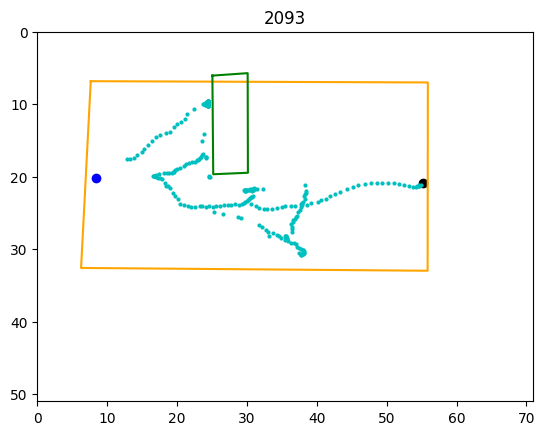

In [57]:
plt.ylim([51,0]); plt.xlim([0, 71])
plt.gca().set_title(str(ind))
plt.plot([df.at[100,'arenaTL_x_cm'], df.at[100,'arenaTR_x_cm'], df.at[100,'arenaBR_x_cm'], df.at[100,'arenaBL_x_cm'],df.at[100,'arenaTL_x_cm']],
            [df.at[100,'arenaTL_y_cm'], df.at[100,'arenaTR_y_cm'], df.at[100,'arenaBR_y_cm'], df.at[100,'arenaBL_y_cm'],df.at[100,'arenaTL_y_cm']],color='orange')
plt.scatter(df.at[100,'leftportT_x_cm'],df.at[100,'leftportT_y_cm'],color='blue')
plt.scatter(df.at[100,'rightportT_x_cm'],df.at[100,'rightportT_y_cm'],color='black')
plt.scatter(df.at[100,'ts_nose_x_cm'],df.at[100,'ts_nose_y_cm'], color = 'c',s=4)
plt.plot([df.at[100,'gt_obstacleTL_x_cm'], df.at[100,'gt_obstacleTR_x_cm'], df.at[100,'gt_obstacleBR_x_cm'], df.at[100,'gt_obstacleBL_x_cm'],df.at[100,'gt_obstacleTL_x_cm']],
                            [df.at[100,'gt_obstacleTL_y_cm'], df.at[100,'gt_obstacleTR_y_cm'], df.at[100,'gt_obstacleBR_y_cm'], df.at[100,'gt_obstacleBL_y_cm'],df.at[100,'gt_obstacleTL_y_cm']],color='green')

In [86]:
df

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label,body_angle,head_angle
0,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...","[276.73388671875, 277.7872619628906, 278.91140...",...,35.073053,284.787707,22.091172,4.366667,3,33.870214,21.352146,3.0,"[1.3266935499743573, 1.3602339543736754, 1.447...","[2.4715515037663716, 2.660328595487799, 2.6902..."
2,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...","[273.2928466796875, 274.0093688964844, 274.292...",...,25.996610,271.700950,21.076023,7.083333,2,27.103849,21.522427,2.0,"[1.568382959687559, 1.5398347639535594, 1.5376...","[2.0691250727872417, 1.9857674446320008, 2.130..."
3,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...","[278.8973693847656, 278.86993408203125, 278.46...",...,33.212455,361.860593,28.069767,4.866667,5,34.021672,27.772665,5.0,"[1.518498148264399, 1.6972262663307967, 1.7227...","[2.5590852738090386, 2.5976276948830166, 2.734..."
4,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...","[274.5780029296875, 275.8729248046875, 276.339...",...,33.212401,361.932817,28.075369,3.816667,5,34.021672,27.772665,5.0,"[1.5919476709244578, 1.5716657612310478, 1.567...","[2.12046888825406, 1.9884851081914332, 2.02117..."
5,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...","[254.54049682617188, 255.72280883789062, 256.1...",...,25.377931,288.530048,22.381468,3.416667,2,27.103849,21.522427,2.0,"[2.0309691327938717, 2.1005025869562366, 2.116...","[2.191977618415498, 2.191349098206256, 2.16626..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,56302.940531,56304.743001,"[56302.956313, 56302.973017, 56302.989824, 563...","[30310, 30311, 30312, 30313, 30314, 30315, 303...","[98.72337341308594, 98.77510833740234, 98.2880...","[278.1177978515625, 278.57147216796875, 277.96...","[117.97364044189453, 117.46713256835938, 119.7...","[270.9903259277344, 272.0599365234375, 270.500...","[108.59347534179688, 107.69976043701172, 107.2...","[256.61578369140625, 257.5520935058594, 257.78...",...,32.671667,357.894529,27.746232,1.783333,5,34.021672,27.772665,5.0,"[2.33617728237383

(array([238., 526., 465., 288., 172.,  64.,  46.,  32.,  19.,   5.]),
 array([1.26666667, 1.975     , 2.68333333, 3.39166667, 4.1       ,
        4.80833333, 5.51666667, 6.225     , 6.93333333, 7.64166667,
        8.35      ]),
 <BarContainer object of 10 artists>)

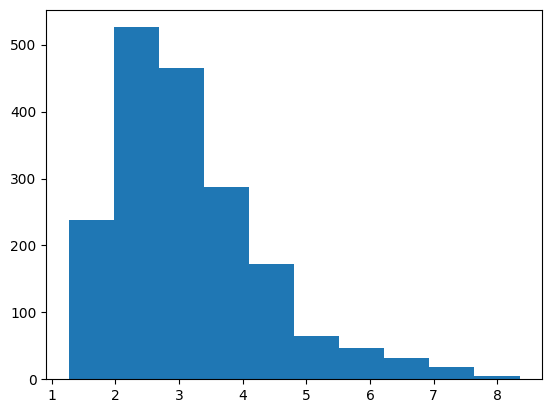

In [87]:
plt.hist(df['time'])

(array([  5.,  65., 236., 506., 704., 239.,  63.,  20.,   6.,  11.]),
 array([23.01578849, 27.53380511, 32.05182173, 36.56983835, 41.08785496,
        45.60587158, 50.1238882 , 54.64190482, 59.15992144, 63.67793805,
        68.19595467]),
 <BarContainer object of 10 artists>)

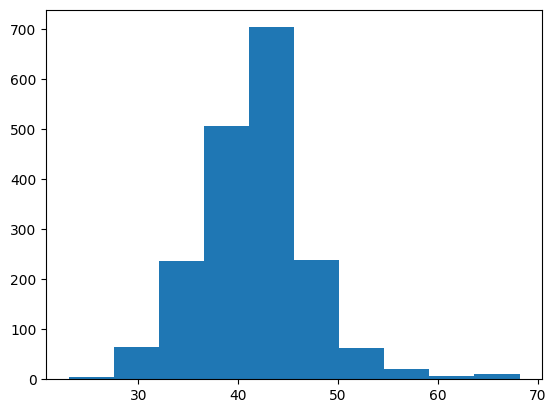

In [88]:
plt.hist(df['dist'])

In [75]:
str(pd.unique(df.date))

"['042823' '050123' '050223' '050323']"

In [60]:
df.columns.to_numpy()

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'leftear_x', 'leftear_y', 'rightear_x',
       'rightear_y', 'spine_x', 'spine_y', 'midspine_x', 'midspine_y',
       'tailbase_x', 'tailbase_y', 'midtail_x', 'midtail_y', 'tailend_x',
       'tailend_y', 'arenaTL_x', 'arenaTL_y', 'arenaTR_x', 'arenaTR_y',
       'arenaBL_x', 'arenaBL_y', 'arenaBR_x', 'arenaBR_y', 'obstacleTL_x',
       'obstacleTL_y', 'obstacleTR_x', 'obstacleTR_y', 'obstacleBR_x',
       'obstacleBR_y', 'obstacleBL_x', 'obstacleBL_y', 'leftportT_x',
       'leftportT_y', 'leftportB_x', 'leftportB_y', 'rightportT_x',
       'rightportT_y', 'rightportB_x', 'rightportB_y', 'len', 'animal',
       'date', 'task', 'nose_x_cm', 'nose_y_cm', 'leftear_x_cm',
       'leftear_y_cm', 'rightear_x_cm', 'rightear_y_cm', 'spine_x_cm',
       'spine_y_cm', 'midspine_x_cm', 'midspine_y_cm', 'tailbase_x_cm',
       'tailbase_y_cm', 'midtail_x_cm', 'midtail_y_cm', 'tailend_x_cm',
     

In [61]:
for ind,row in df.iterrows(): 
            dist = np.nansum(np.abs(np.diff(row['ts_nose_x_cm'])))
            df.at[ind,'dist'] = dist

(array([ 162., 1389.,  370.,   45.,   24.,   16.,    7.,    3.,    3.,
           5.]),
 array([ 23.01578849,  34.25438796,  45.49298742,  56.73158689,
         67.97018636,  79.20878583,  90.44738529, 101.68598476,
        112.92458423, 124.16318369, 135.40178316]),
 <BarContainer object of 10 artists>)

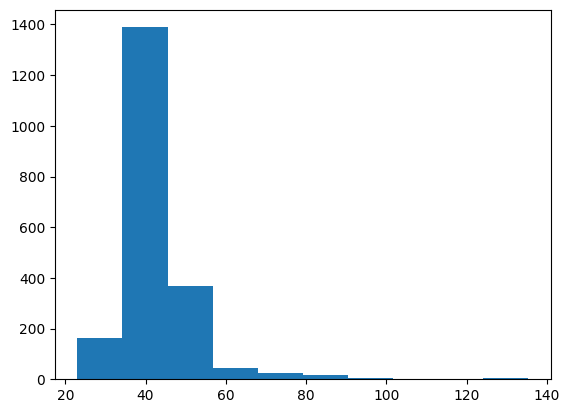

In [62]:
plt.hist(df['dist'])

In [69]:
df

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label
0,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...","[276.73388671875, 277.7872619628906, 278.91140...",...,29.108323,452.143255,35.073053,284.787707,22.091172,4.366667,4,33.870214,21.352146,3.0
2,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...","[273.2928466796875, 274.0093688964844, 274.292...",...,28.164548,335.134548,25.996610,271.700950,21.076023,7.083333,2,27.103849,21.522427,2.0
3,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...","[278.8973693847656, 278.86993408203125, 278.46...",...,34.973858,428.157409,33.212455,361.860593,28.069767,4.866667,0,34.021672,27.772665,5.0
4,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...","[274.5780029296875, 275.8729248046875, 276.339...",...,34.959468,428.156719,33.212401,361.932817,28.075369,3.816667,0,34.021672,27.772665,5.0
5,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...","[254.54049682617188, 255.72280883789062, 256.1...",...,29.440418,327.158874,25.377931,288.530048,22.381468,3.416667,2,27.103849,21.522427,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,56302.940531,56304.743001,"[56302.956313, 56302.973017, 56302.989824, 563...","[30310, 30311, 30312, 30313, 30314, 30315, 303...","[98.72337341308594, 98.77510833740234, 98.2880...","[278.1177978515625, 278.57147216796875, 277.96...","[117.97364044189453, 117.46713256835938, 119.7...","[270.9903259277344, 272.0599365234375, 270.500...","[108.59347534179688, 107.69976043701172, 107.2...","[256.61578369140625, 257.5520935058594, 257.78...",...,34.690804,421.426981,32.671667,357.894529,27.746232,1.783333,0,34.021672,27.772665,5.0
1921,56304.743001,56308.159424,"[56304.757056, 56304.774336, 56304.790336, 563...","[[30418, 30419, 30420, 30421, 30422, 30423, 30...","[684.2345581054688, nan, nan, nan, nan, nan, n...","[274.73858642578125, nan, nan, nan, nan, nan, ...","[671.4081420898438, 673.470458984375, 675.5931...","[264.4236145019531, 265.5867919921875, 266.306...","[671.801025390625, 673.9246826171875, 675.5325...","[

In [79]:
df['cluster_label'].to_numpy()[:100]

array([3., 2., 5., 5., 2., 2., 2., 0., 3., 3., 3., 2., 2., 2., 1., 1., 0.,
       0., 0., 2., 2., 1., 1., 1., 1., 5., 5., 5., 0., 0., 2., 2., 2., 1.,
       1., 1., 3., 3., 3., 0., 0., 0., 2., 2., 2., 5., 5., 2., 2., 2., 4.,
       4., 4., 0., 0., 0., 3., 5., 5., 0., 3., 3., 0., 2., 2., 2., 3., 3.,
       0., 0., 2., 2., 2., 3., 3., 2., 2., 2., 0., 0., 0., 1., 3., 2., 2.,
       0., 0., 5., 5., 5., 0., 5., 1., 1., 2., 2., 5., 5., 1., 0.])

In [63]:
short=df.loc[df['dist']<70]

In [70]:
short

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label,speed,dist
1,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...","[276.73388671875, 277.7872619628906, 278.91140...",...,35.073053,284.787707,22.091172,4.366667,5,33.913882,21.347584,3.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",35.992197
3,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...","[273.2928466796875, 274.0093688964844, 274.292...",...,25.996610,271.700950,21.076023,7.083333,4,27.144049,21.524808,2.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.497372
4,55863.809664,55873.899059,"[55863.821913, 55863.837798, 55863.854438, 558...","[1448, 1449, 1450, 1451, 1452, 1453, 1454, 145...","[96.26150512695312, 96.93238830566406, 96.9538...","[277.65374755859375, 277.765380859375, 277.494...","[115.45161437988281, 114.95975494384766, 115.2...","[264.1031494140625, 264.96728515625, 264.38143...","[104.1373519897461, 103.85972595214844, 104.04...","[255.9171600341797, 256.4959411621094, 256.100...",...,26.007179,271.925357,21.093431,10.066667,4,27.144049,21.524808,2.0,"[3.2761003524276373, 0.10022481270447717, 0.22...",55.470046
5,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...","[278.8973693847656, 278.86993408203125, 278.46...",...,33.212455,361.860593,28.069767,4.866667,1,34.059624,27.749496,5.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",41.308646
7,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...","[274.5780029296875, 275.8729248046875, 276.339...",...,33.212401,361.932817,28.075369,3.816667,1,34.059624,27.749496,5.0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",43.076652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,56302.940531,56304.743001,"[56302.956313, 56302.973017, 56302.989824, 563...","[30310, 30311, 30312, 30313, 30314, 30315, 303...","[98.72337341308594, 98.77510833740234, 98.2880...","[278.1177978515625, 278.57147216796875, 277.96...","[117.97364044189453, 117.46713256835938, 119.7...","[270.9903259277344, 272.0599365234375, 270.500...","[108.59347534179688, 107.69976043701172, 107.2...","[256.61578369140625, 257.5520935058594, 257.78...",...,32.671667,357.894529,27.746232,1.783333,1,34.059624,27.749496,5.0,"[0.24011113283539934, 2.246541778621733, 2.569...",45.761039
2090,56304.743001,56308.159424,"[56304.757056, 56304.774336, 56304.790336, 563...","[[30418, 30419, 30420, 30421, 30422, 30423, 30...","[684.2345581054688, nan, nan, nan, nan, 